In [1]:
# twitter
# api key zhwCkCeGpNOWQWKsxyzBOa40R
# secret bmmlaFsTIfdKLBzdqAcPawysXKATBacOSoWh37LK4V0QURQPxT
# bearer AAAAAAAAAAAAAAAAAAAAAL0mHAEAAAAAznnM6K4lw5npEXNbiLrA%2B5m78W4%3DSKpNKovgHYbjQVT54KSnmbJJilZufD7GKIjmTZ5CCSySEJtkxO



In [107]:
import requests
import os
import json
import GetOldTweets3 as got
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
userid = 'AP_Richmond'

In [138]:
tweetCriteria = got.manager.TweetCriteria().setUsername(userid)\
                                           .setSince('2015-01-01')
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

In [139]:
len(tweets)

1304

In [140]:
df = pd.DataFrame({"id":[t.id for t in tweets], "date":[t.date for t in tweets], "text":[t.text for t in tweets]})

In [141]:
# readable truncated date
df['dt'] = df.date.dt.strftime("%Y-%m-%d")

In [142]:
df.shape

(1304, 4)

In [147]:
df['Mold Spore'] = df.text.str.replace(',','').str.extract('Mold Spore-? ([0-9]+)', re.IGNORECASE)
df['Tree Pollen'] = df.text.str.replace(',','').str.extract('Tree Pollen-? ([0-9,]+)', re.IGNORECASE)
df['Grass Pollen'] = df.text.str.replace(',','').str.extract('Grass Pollen-? ([0-9,]+)', re.IGNORECASE)

In [148]:
# drop tweets with no allergen counts
df = df[~(df['Mold Spore'].isnull().values & df['Tree Pollen'].isnull().values & df['Grass Pollen'].isnull().values)]

In [149]:
df.shape

(886, 7)

In [150]:
df = df.fillna(0)
df['Mold Spore'] = df['Mold Spore'].astype('int')
df['Tree Pollen'] = df['Tree Pollen'].astype('int')
df['Grass Pollen'] = df['Grass Pollen'].astype('int')

In [160]:
df.set_index('date',inplace=True)

In [229]:
df.to_json('allergy_tweets_2015_20200824.json')

In [230]:
pd.read_json('allergy_tweets_2015_20200824.json')

,id,text,dt,mold,tree,grass
2020-08-06 17:11:12,1291421577049976832,"8/6/20 Mold Spore- 9,756 Moderate",2020-08-06,9756,0,0
2020-08-05 15:51:04,1291039023578976256,"8/5/20 Mold Spore- 9,180 Moderate",2020-08-05,9180,0,0
2020-08-04 16:07:21,1290680734643101696,"8/4/2020 Mold Spore- 2,520 Low",2020-08-04,2520,0,0
2020-08-03 17:37:43,1290341089178787840,"8/3/2020 Mold Spore- 4,770 Low",2020-08-03,4770,0,0
2020-07-29 15:50:06,1288502064558026752,"7/29/20 Mold Spore- 6,180 Low",2020-07-29,6180,0,0
...,...,...,...,...,...,...
2015-04-03 16:52:35,584035778273157120,"4/2/15 Tree Pollen- 306 High Mold Spore- 4,500...",2015-04-03,4500,306,0
2015-04-02 16:38:29,583669843418882048,"4/2/15 Tree Pollen- 108 High Mold Spore- 2,250...",2015-04-02,2250,108,0
2015-04-01 16:29:59,583305315707457536,"4/1/15 Tree Pollen- 327 High Mold Spore- 4,050...",2015-04-01,4050,327,0
2015-03-31 21:28:40,583018094609731584,3/31/15 Tree Pollen- 50 Moderate Mold Spore- 1...,2015-03-31,1800,50,0


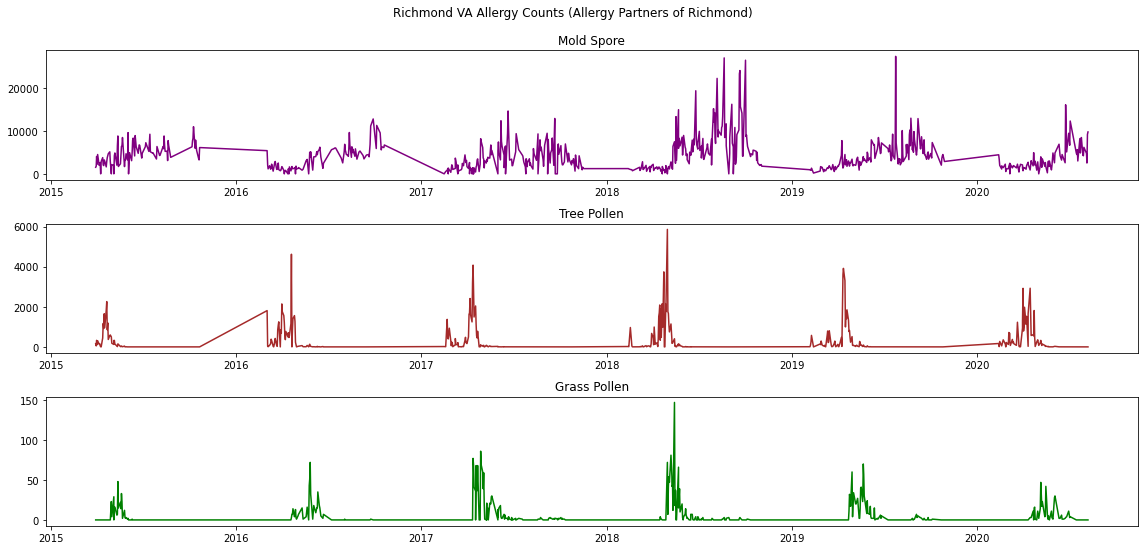

In [155]:
# Create figure and plot space
fig, axs = plt.subplots(3,figsize=(16, 8))

# Add x-axis and y-axis
axs[0].plot(df.index.values, df['Mold Spore'], color='purple')
axs[0].set_title('Mold Spore')

axs[1].plot(df.index.values, df['Tree Pollen'], color='brown')
axs[1].set_title('Tree Pollen')

axs[2].plot(df.index.values, df['Grass Pollen'], color='green')
axs[2].set_title('Grass Pollen')

plt.suptitle('Richmond VA Allergen Counts (Allergy Partners of Richmond)')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
#y=['Mold Spore','Tree Pollen','Grass Pollen'])

In [168]:
from pandas.tseries.offsets import DateOffset

In [172]:
df.columns = ['id', 'text', 'dt', 'mold', 'tree', 'grass']

In [209]:
mold17 = df.loc['2017']['mold'].reset_index()
mold17['date'] = mold17.date + DateOffset(years=1)
mold17.columns = ['date','mold17']

mold16 = df.loc['2016']['mold'].reset_index()
mold16['date'] = mold16.date + DateOffset(years=2)
mold16.columns = ['date','mold16']

mold15 = df.loc['2015']['mold'].reset_index()
mold15['date'] = mold15.date + DateOffset(years=3)
mold15.columns = ['date','mold15']

mold18 = df.loc['2018']['mold'].reset_index()
mold18.columns = ['date','mold18']

mold19 = df.loc['2019']['mold'].reset_index()
mold19['date'] = mold19.date + DateOffset(years=-1)
mold19.columns = ['date','mold19']

mold20 = df.loc['2020']['mold'].reset_index()
mold20['date'] = mold20.date + DateOffset(years=-2)
mold20.columns = ['date','mold20']

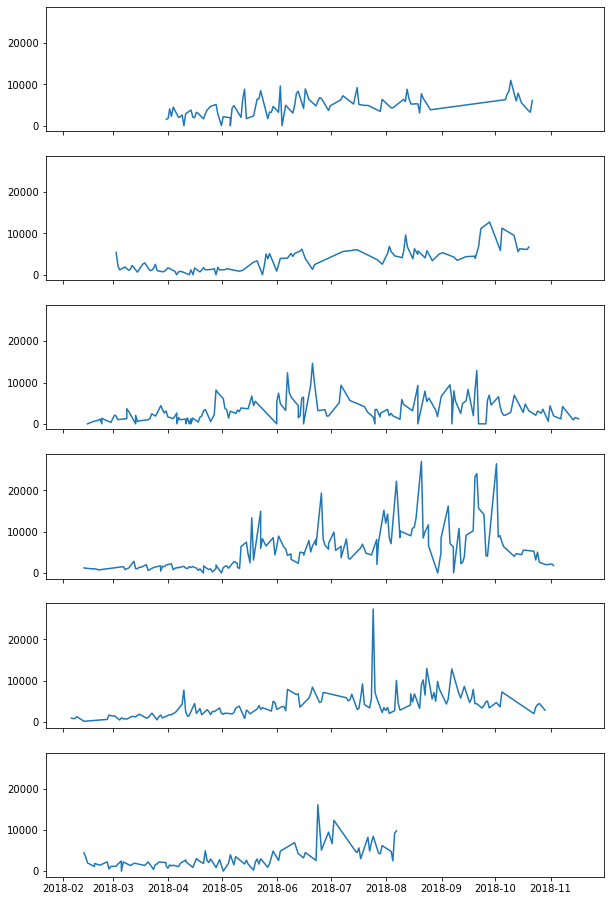

In [225]:
# Create figure and plot space
fig, ax = plt.subplots(6, figsize=(10, 16), sharey=True, sharex=True)

# Add x-axis and y-axis
ax[0].plot(mold15.date, mold15.mold15)
ax[1].plot(mold16.date, mold16.mold16)
ax[2].plot(mold17.date, mold17.mold17)
ax[3].plot(mold18.date, mold18.mold18)
ax[4].plot(mold19.date, mold19.mold19)
ax[5].plot(mold20.date, mold20.mold20)

#plt.suptitle('Richmond VA Allergen Counts (Allergy Partners of Richmond)')

#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
#y=['Mold Spore','Tree Pollen','Grass Pollen'])

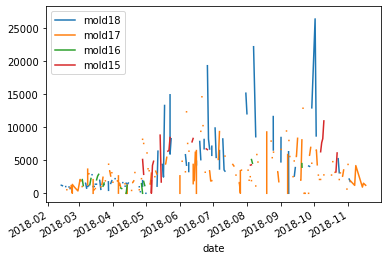

In [199]:
df2.plot(x='date', y=['mold18', 'mold17', 'mold16', 'mold15'])

In [17]:
def auth():
    return 'AAAAAAAAAAAAAAAAAAAAAL0mHAEAAAAAznnM6K4lw5npEXNbiLrA%2B5m78W4%3DSKpNKovgHYbjQVT54KSnmbJJilZufD7GKIjmTZ5CCSySEJtkxO'
    #return os.environ.get("BEARER_TOKEN")

def create_url():
    query = "from:{} -is:retweet".format(userid)
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    tweet_fields = "tweet.fields=author_id"
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}&start_time=2019-08-24T02:28:39Z".format(
        query, tweet_fields
    )
    return url

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers


def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


In [18]:
#https://api.twitter.com/2/tweets/search/recent?query=from:TwitterDev
bearer_token = auth()
url = create_url()
headers = create_headers(bearer_token)
json_response = connect_to_endpoint(url, headers)
print(json.dumps(json_response, indent=4, sort_keys=True))

400


Exception: (400, '{"errors":[{"parameters":{"start_time":["2019-08-24T02:28Z"]},"message":"Invalid \'start_time\':\'2019-08-24T02:28Z\'. \'start_time\' must be on or after 2020-08-17T02:57Z"}],"title":"Invalid Request","detail":"One or more parameters to your request was invalid.","type":"https://api.twitter.com/2/problems/invalid-request"}')

In [13]:
def get_rules(headers, bearer_token):
    response = requests.get(
        "https://api.twitter.com/2/tweets/search/stream/rules", headers=headers
    )
    if response.status_code != 200:
        raise Exception(
            "Cannot get rules (HTTP {}): {}".format(response.status_code, response.text)
        )
    print(json.dumps(response.json()))
    return response.json()

In [10]:
def set_rules(headers, bearer_token):
    # You can adjust the rules if needed
    sample_rules = [
        {"value": "from:{} -is:retweet".format(userid), "tag": "from ap_rva"}
    ]
    payload = {"add": sample_rules}
    response = requests.post(
        "https://api.twitter.com/2/tweets/search/stream/rules",
        headers=headers,
        json=payload,
    )
    if response.status_code != 201:
        raise Exception(
            "Cannot add rules (HTTP {}): {}".format(response.status_code, response.text)
        )
    print(json.dumps(response.json()))

In [11]:
def get_stream(headers, set, bearer_token):
    response = requests.get(
        "https://api.twitter.com/2/tweets/search/stream", headers=headers, stream=True,
    )
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Cannot delete rules (HTTP {}): {}".format(
                response.status_code, response.text
            )
        )
    for response_line in response.iter_lines():
        if response_line:
            json_response = json.loads(response_line)
            print(json.dumps(json_response, indent=4, sort_keys=True))

In [16]:
bearer_token = auth() #os.environ.get("BEARER_TOKEN")
headers = create_headers(bearer_token)
rules = get_rules(headers, bearer_token)
set = set_rules(headers, bearer_token)
get_stream(headers, set, bearer_token)

{"meta": {"sent": "2020-08-24T02:53:27.011Z"}}
{"data": [{"value": "from:AP_Richmond -is:retweet", "tag": "from ap_rva", "id": "1297728699215818754"}], "meta": {"sent": "2020-08-24T02:53:28.034Z", "summary": {"created": 1, "not_created": 0, "valid": 1, "invalid": 0}}}
200


KeyboardInterrupt: 

In [15]:
headers

{'Authorization': 'Bearer None'}